## Geospatial Data Sciecne Workshop
### Professor Song Gao, Department of Geography @UW-Madison
### Faculty Affiliate of Data Science Institute @UW-Madison
### Email: song.gao@wisc.edu

## (1) Vector Data Processing

In [8]:
import pandas as pd
import geopandas as gpd
import json

# Load geojson or shapefile of COVID-19 data at the census tract level
# https://data.dhsgis.wi.gov/datasets/wi-dhs::covid-19-data-by-census-tract-v2/about

with open('./data/COVID-19_Data_by_Census_Tract_V2.geojson', 'r') as covid_file:
    covid_geojson = json.load(covid_file)
    
# Extract positive information of each census tract
covid_data = []
for feature in covid_geojson["features"]:
    geoid = feature["properties"]["GEOID"]
    date = feature["properties"]["Date"]
    positive = feature["properties"]["POS_CUM_CP"]
    covid_data.append([geoid, date, positive])
print(covid_data[0])

['55009010201', '2023-04-17T06:00:00Z', 1288]


In [9]:
# Construct the DataFrame of COVID-19 data
covid_data = pd.DataFrame(covid_data, columns=["ct", "date", "positive"])
covid_data.head()

,ct,date,positive
0,55009010201,2023-04-17T06:00:00Z,1288
1,55009010202,2023-04-17T06:00:00Z,2824
2,55009010300,2023-04-17T06:00:00Z,2623
3,55009020100,2023-04-17T06:00:00Z,1903
4,55009020203,2023-04-17T06:00:00Z,2679


In [10]:
# Assign GEOID at multiple levels
covid_data["county"] = covid_data["ct"].apply(lambda x: str(x)[0:5])
covid_data

,ct,date,positive,county
0,55009010201,2023-04-17T06:00:00Z,1288,55009
1,55009010202,2023-04-17T06:00:00Z,2824,55009
2,55009010300,2023-04-17T06:00:00Z,2623,55009
3,55009020100,2023-04-17T06:00:00Z,1903,55009
4,55009020203,2023-04-17T06:00:00Z,2679,55009
...,...,...,...,...
1388,55005000100,2023-04-17T06:00:00Z,1129,55005
1389,55005000200,2023-04-17T06:00:00Z,1689,55005
1390,55005000300,2023-04-17T06:00:00Z,1384,55005
1391,55005000400,2023-04-17T06:00:00Z,2094,55005


,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
0,2023-04-18T19:00:00+00:00,55009010201,None,1288,0,0.29,7,0,0.0,0,...,880,359,2023-04-17T06:00:00+00:00,4572,353.0,246,Census tract,1.013717e+07,22982.431853,"POLYGON ((-88.05778 44.46213, -88.05844 44.462..."
1,2023-04-18T19:00:00+00:00,55009010202,None,2824,0,0.43,25,0,0.0,0,...,1992,746,2023-04-17T06:00:00+00:00,5204,334.0,247,Census tract,1.255451e+07,17135.642417,"POLYGON ((-88.09930 44.41616, -88.09671 44.418..."
2,2023-04-18T19:00:00+00:00,55009010300,None,2623,1,0.57,12,0,0.0,0,...,1892,662,2023-04-17T06:00:00+00:00,7214,405.0,248,Census tract,3.465319e+07,42091.790563,"POLYGON ((-88.03813 44.44027, -88.04154 44.441..."
3,2023-04-18T19:00:00+00:00,55009020100,None,1903,0,0.29,9,0,0.0,0,...,1325,501,2023-04-17T06:00:00+00:00,6086,203.0,249,Census tract,3.267504e+08,85264.168918,"MULTIPOLYGON (((-87.76258 44.63894, -87.76258 ..."
4,2023-04-18T19:00:00+00:00,55009020203,None,2679,0,0.29,6,0,0.0,0,...,1887,718,2023-04-17T06:00:00+00:00,6820,175.0,250,Census tract,1.001197e+08,82418.093271,"MULTIPOLYGON (((-87.99400 44.67754, -87.99403 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,2023-04-18T19:00:00+00:00,55005000100,None,1129,1,0.29,9,0,0.0,0,...,690,380,2023-04-17T06:00:00+00:00,3939,227.0,3549,Census tract,7.360161e+08,144079.875508,"POLYGON ((-91.87568 45.63885, -91.87598 45.638..."
1389,2023-04-18T19:00:00+00:00,55005000200,None,1689,0,0.29,18,0,0.0,0,...,741,873,2023-04-17T06:00:00+00:00,4010,263.0,3550,Census tract,3.998938e+08,94225.368480,"POLYGON ((-92.03142 45.63994, -92.06390 45.640..."
1390,2023-04-18T19:00:00+00:00,55005000300,None,1384,0,0.14,4,0,0.0,0,...,775,568,2023-04-17T06:00:00+00:00,3877,177.0,3551,Census tract,5.345687e+08,116060.458471,"POLYGON ((-91.90946 45.54237, -91.91053 45.542..."
1391,2023-04-18T19:00:00+00:00,55005000400,None,2094,0,0.43,24,0,0.0,0,...,1303,700,2023-04-17T06:00:00+00:00,5348,290.0,3552,Census tract,4.422860e+08,102220.016987,"POLYGON ((-91.76489 45.53090, -91.76493 45.532..."


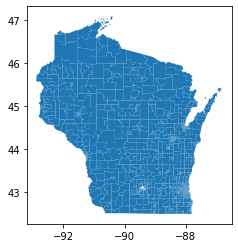

In [12]:
## Read a GeoJSON File into a GeoPandas DataFrame
import geopandas as gpd
gdf = gpd.read_file('./data/COVID-19_Data_by_Census_Tract_V2.geojson')
gdf.plot()
gdf

<AxesSubplot:>

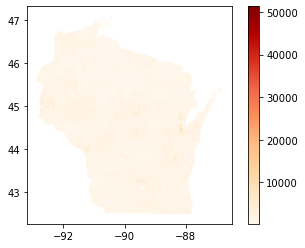

In [18]:
## Create a choropleth map using the cumulative positive cases or another target variable
# https://geopandas.org/en/stable/docs/user_guide/mapping.html

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

gdf.plot(column='POS_CUM_CP', ax=ax, cmap='OrRd', legend=True)


,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry,county
8,2023-04-18T19:00:00+00:00,55025000100,None,664,0,0.57,1,0,0.00,0,...,350,2023-04-17T06:00:00+00:00,2437,306.0,254,Census tract,3.873392e+06,11250.550418,"POLYGON ((-89.48240 43.09452, -89.48322 43.094...",55025
9,2023-04-18T19:00:00+00:00,55025000201,None,507,0,0.29,4,0,0.00,0,...,259,2023-04-17T06:00:00+00:00,2059,127.0,255,Census tract,3.502693e+06,8135.082414,"POLYGON ((-89.47186 43.07440, -89.47251 43.074...",55025
10,2023-04-18T19:00:00+00:00,55025000202,None,768,0,0.29,2,0,0.00,0,...,382,2023-04-17T06:00:00+00:00,3174,228.0,256,Census tract,4.494409e+06,8963.417218,"POLYGON ((-89.48315 43.07522, -89.48386 43.075...",55025
11,2023-04-18T19:00:00+00:00,55025000204,None,1526,0,0.14,4,0,0.00,0,...,791,2023-04-17T06:00:00+00:00,5555,339.0,257,Census tract,5.022224e+06,9114.360350,"POLYGON ((-89.50241 43.07664, -89.50292 43.076...",55025
12,2023-04-18T19:00:00+00:00,55025000205,None,1136,0,0.71,1,0,0.00,0,...,549,2023-04-17T06:00:00+00:00,5089,306.0,258,Census tract,7.711717e+06,15651.846004,"POLYGON ((-89.48084 43.08031, -89.48315 43.081...",55025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2023-04-18T19:00:00+00:00,55025002700,None,1339,0,0.14,3,0,0.14,0,...,712,2023-04-17T06:00:00+00:00,3306,146.0,3199,Census tract,5.957637e+06,10993.176117,"POLYGON ((-89.31670 43.10655, -89.32108 43.106...",55025
1382,2023-04-18T19:00:00+00:00,55025002800,None,603,0,0.29,2,0,0.00,0,...,350,2023-04-17T06:00:00+00:00,2152,175.0,3200,Census tract,3.371372e+06,7675.929583,"POLYGON ((-89.30972 43.07136, -89.30985 43.072...",55025
1383,2023-04-18T19:00:00+00:00,55025002900,None,989,1,0.43,4,0,0.00,0,...,587,2023-04-17T06:00:00+00:00,3166,198.0,3201,Census tract,6.300601e+06,10677.631754,"POLYGON ((-89.30807 43.04794, -89.30808 43.047...",55025
1384,2023-04-18T19:00:00+00:00,55025003001,None,1604,0,0.14,13,0,0.00,0,...,859,2023-04-17T06:00:00+00:00,4861,309.0,3202,Census tract,7.073964e+06,10986.263255,"POLYGON ((-89.28379 43.08453, -89.28462 43.087...",55025


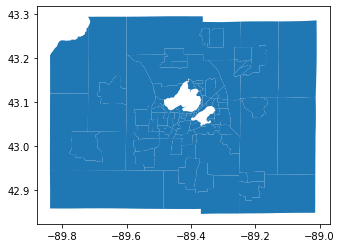

In [26]:
## Spatially zoom into the Dane County
# Assign GEOID at multiple levels
gdf["county"] = gdf["GEOID"].apply(lambda x: str(x)[0:5])
dane=gdf[gdf["county"]=='55025']
dane.plot()
dane

<AxesSubplot:>

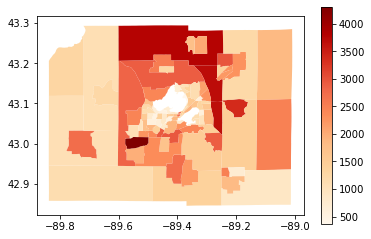

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

dane.plot(column='POS_CUM_CP', ax=ax, cmap='OrRd', legend=True)


### Multiscale Dynamic Human Mobility Flow Dataset in the U.S. during the COVID-19 Pandemic

Monitoring dynamic human mobility changes and travel flow patterns at different geographic scales is crucial for understanding human behavior changes during the COVID-19 pandemic. The open data created by the GeoDS Lab at UW-Madison are available at the census tract, county, and state levels. Please download one week of "weekly flow data" at the census tract level for Dane County, WI and convert them to ZCTA-to-ZCTA flow data matrix. 
## https://github.com/GeoDS/COVID19USFlows

In [3]:
!pip install wget ## a package to source data from websites

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0d4df403962a049406094a8868ab588ada3df3da69e4eef4b1f85938444ae19a
  Stored in directory: /home/jovyan/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [4]:
## Download Data Files and store into a folder "mobilityflows"
import wget
data_folder="./mobilityflows"
for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_01_04/weekly_ct2ct_2021_01_04_"+str(i)+".csv"
    wget.download(url, out='./mobilityflows')


In [8]:
# Merge all files
import os
import pandas as pd
data_folder="./mobilityflows"
flow_all = []
for file in os.listdir(data_folder):
    if file[-3:] == "csv" and 'weekly_ct2ct' in file:
        print(data_folder+"/"+file)
        flow_df = pd.read_csv(data_folder+"/"+file)
        flow_all.append(flow_df)
result = pd.concat([x for x in flow_all])
result.to_csv("weekly_ct2ct_2021_01_04.csv", index=False)
print(result.shape)
result.head()

./mobilityflows/weekly_ct2ct_2021_01_04_18.csv
./mobilityflows/weekly_ct2ct_2021_01_04_16.csv
./mobilityflows/weekly_ct2ct_2021_01_04_11.csv
./mobilityflows/weekly_ct2ct_2021_01_04_0.csv
./mobilityflows/weekly_ct2ct_2021_01_04_7.csv
./mobilityflows/weekly_ct2ct_2021_01_04_9.csv
./mobilityflows/weekly_ct2ct_2021_01_04_10.csv
./mobilityflows/weekly_ct2ct_2021_01_04_17.csv
./mobilityflows/weekly_ct2ct_2021_01_04_19.csv
./mobilityflows/weekly_ct2ct_2021_01_04_8.csv
./mobilityflows/weekly_ct2ct_2021_01_04_6.csv
./mobilityflows/weekly_ct2ct_2021_01_04_1.csv
./mobilityflows/weekly_ct2ct_2021_01_04_2.csv
./mobilityflows/weekly_ct2ct_2021_01_04_5.csv
./mobilityflows/weekly_ct2ct_2021_01_04_14.csv
./mobilityflows/weekly_ct2ct_2021_01_04_13.csv
./mobilityflows/weekly_ct2ct_2021_01_04_4.csv
./mobilityflows/weekly_ct2ct_2021_01_04_3.csv
./mobilityflows/weekly_ct2ct_2021_01_04_12.csv
./mobilityflows/weekly_ct2ct_2021_01_04_15.csv
(6883602, 9)


,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,6037404301,6071012700,-117.904111,34.127527,-117.555768,34.049050,01/04/21 - 01/10/21,4,221.0
1,6037404301,6037980010,-117.904111,34.127527,-118.239338,34.080042,01/04/21 - 01/10/21,6,331.0
2,6037404301,6037404600,-117.904111,34.127527,-117.963727,34.112119,01/04/21 - 01/10/21,8,442.0
3,6037404301,6037430721,-117.904111,34.127527,-118.041721,34.137804,01/04/21 - 01/10/21,4,221.0
4,6037404301,6065040702,-117.904111,34.127527,-117.547111,33.939578,01/04/21 - 01/10/21,6,331.0


In [44]:
print(result.shape)
print(result.dtypes)

(6883602, 9)
geoid_o           object
geoid_d           object
lng_o            float64
lat_o            float64
lng_d            float64
lat_d            float64
date_range        object
visitor_flows      int64
pop_flows        float64
dtype: object


In [45]:
## filter out the data in Dane County (or another county) starting with GeoID 55025
result[[ 'geoid_o', 'geoid_d']] = result[['geoid_o','geoid_d']].astype(str) # Multiple columns string conversion
print(result.dtypes)
dane_county_flows_ct = result[result['geoid_o'].str.startswith('55025') & result['geoid_d'].str.startswith('55025')]
dane_county_flows_ct

geoid_o           object
geoid_d           object
lng_o            float64
lat_o            float64
lng_d            float64
lat_d            float64
date_range        object
visitor_flows      int64
pop_flows        float64
dtype: object


,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
50037,55025000401,55025000300,-89.448349,43.054707,-89.460265,43.067650,01/04/21 - 01/10/21,15,1326.0
50038,55025000401,55025000600,-89.448349,43.054707,-89.457850,43.025689,01/04/21 - 01/10/21,4,353.0
50039,55025000401,55025000100,-89.448349,43.054707,-89.475453,43.082941,01/04/21 - 01/10/21,4,353.0
50040,55025000401,55025000405,-89.448349,43.054707,-89.510079,43.045547,01/04/21 - 01/10/21,9,795.0
50042,55025000401,55025010901,-89.448349,43.054707,-89.547491,43.065985,01/04/21 - 01/10/21,4,353.0
...,...,...,...,...,...,...,...,...,...
258118,55025012202,55025012202,-89.237087,42.928356,-89.237087,42.928356,01/04/21 - 01/10/21,365,7440.0
258119,55025012202,55025012300,-89.237087,42.928356,-89.214768,42.900296,01/04/21 - 01/10/21,192,3913.0
258122,55025012202,55025010903,-89.237087,42.928356,-89.551370,43.030590,01/04/21 - 01/10/21,4,81.0
258123,55025012202,55025001300,-89.237087,42.928356,-89.391536,43.054143,01/04/21 - 01/10/21,12,244.0


## (2) Raster Data Analysis and Google Earth Engine

In [ ]:
!pip install geemap

In [ ]:
!pip install -U google-api-python-client==1.12.8
## https://github.com/giswqs/geemap/discussions/243!

###  Create your own personal Google Earth Engigne Account (free for academic and research use.)
https://code.earthengine.google.com/register

### Add the Dynymic World 10m near-real-time (NRT) Land Use/Land Cover (LULC) dataset that includes class label information for nine LULC classes: Water, Trees, Grass, Flooded vegetation, Crops, Shrub and Scrub, Built-up, Bare, Snow and ice from yr 2015-Present:

https://www.nature.com/articles/s41597-022-01307-4

In [ ]:
import ee
import geemap

ee.Authenticate()

Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

In [ ]:
# Set the region of interest by simply drawing a polygon on the map
region = Map.user_roi
if region is None:
    region = ee.Geometry.BBox(-89.7088, 42.9006, -89.0647, 43.2167) ## You can also set a Polygon: ee.Geometry.Polygon()
Map.centerObject(region)

In [ ]:
# Set the date range to query the data
start_date = '2016-01-01'
end_date = '2016-12-31'

In [ ]:
# Create Dynamic World land cover composite
# The "return_type" can be hillshade, visualize, class, or probability. 
# If you want to use the resulting images for further analysis, you should use class.

landcover = geemap.dynamic_world(region, start_date, end_date, return_type='hillshade')
Map.addLayer(landcover, {}, 'Land Cover')
# Add legend to the map
Map.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
Map.centerObject(region)
Map

In [ ]:
## Return "class" images for further zonal summary analysis 
classes = geemap.dynamic_world(region, start_date, end_date, return_type='class')
df = geemap.image_area_by_group(classes, region=region, scale=10, denominator=1e6)
df

## Create Landsat satellite image timeseries
https://geemap.org/geemap/#geemap.geemap.Map.add_landsat_ts_gif


In [52]:
!pip install ffmpeg-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
out_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

Map = geemap.Map()
label = 'Land Cover/Use Changes in Doha, Qatar'

# Set the region of interest by simply drawing a polygon on the map
region = Map.user_roi
if region is None:
    region = ee.Geometry.BBox(51.23621, 25.24974, 51.71862, 25.48035) # set your own region bounding box
# ee.Geometry.BBox(-89.7088, 42.9006, -89.0647, 43.2167) # Madison bounding box

Map.centerObject(region)

Map.add_landsat_ts_gif(
    label=label,
    roi=region,
    start_year=1985,
    bands=['Red', 'Green', 'Blue'],
    font_color='white',
    frames_per_second=5,
    progress_bar_color='blue',
    out_gif=out_dir+'/landsat_ts.gif',
)

## (3) Street Network Analysis Using OSMnx
- [GitHub repo](https://github.com/gboeing/osmnx)

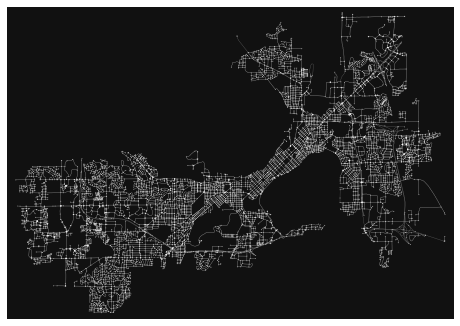

In [39]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline

# get the network for downloading
G = ox.graph_from_place('Madison, WI, USA', network_type='drive', simplify=True)
fig, ax = ox.plot_graph(G, figsize=(8,8), node_size=1, node_alpha=0.5,
                        edge_linewidth=0.2, save=True, dpi=200,filepath='./madison.jpg')

In [48]:
## Compute network stats
G = nx.MultiDiGraph(G) # convert a MultiGraph to simple Graph
print(G)
betweennessCentrality = nx.edge_betweenness_centrality(G,normalized=True) # (start_node, end_node) : betw_value
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(len(betweennessCentrality))

MultiDiGraph with 8648 nodes and 21356 edges
8648
21356
21356


len(Betweenness) 21356
0.0 0.19589414294560703
len(Betweenness_list) 21356
1.3372692555272281e-08 1
len(color_scale) 21356


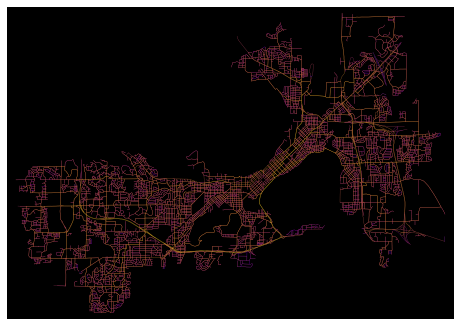

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [51]:
import matplotlib.cm as cm
import matplotlib.colors as colors

Betweenness = [betweennessCentrality[edge] for edge in G.edges()]
print('len(Betweenness)',len(Betweenness))
print(min(Betweenness), max(Betweenness))

#nx.set_edge_attributes(G, betweennessCentrality, "edge_bc")

Betweenness_list = [i if i != 0 else 1 for i in Betweenness] # for visualization use only (0,1)
print('len(Betweenness_list)',len(Betweenness_list))
print(min(Betweenness_list), max(Betweenness_list))

#color scale converted to list of colors for graph edges
#norm = colors.Normalize(vmin=min(Betweenness), vmax=max(Betweenness))
#norm = colors.PowerNorm(gamma=2,vmin=min(Betweenness), vmax=max(Betweenness))
norm = colors.LogNorm(vmin=min(Betweenness_list), vmax=max(Betweenness_list))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
color_scale = [cmap.to_rgba(cl) for cl in Betweenness]
print('len(color_scale)',len(color_scale))
## osmnx ploting requires the MultiGraph type
ox.plot_graph(G, bgcolor='k',node_size=0, edge_linewidth=0.2, edge_color=color_scale,edge_alpha=1)